In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from collections import Counter
base_dir = '/kaggle/input/pets-facial-expression-dataset/Master Folder'
splits = ['train', 'valid', 'test']

# Dictionary to store image counts
split_class_counts = {}

for split in splits:
    split_path = os.path.join(base_dir, split)
    class_counts = {}
    
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    
    split_class_counts[split] = class_counts





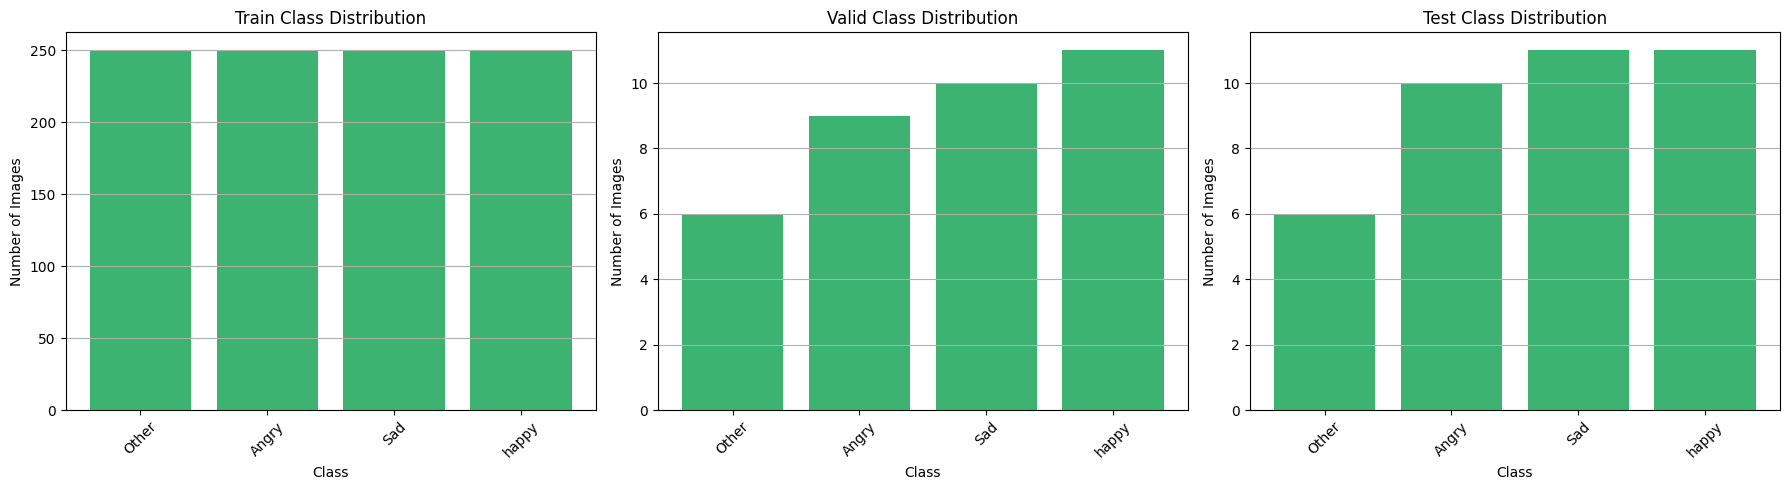

In [2]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, split in enumerate(splits):
    class_counts = split_class_counts[split]
    axs[i].bar(class_counts.keys(), class_counts.values(), color='mediumseagreen')
    axs[i].set_title(f'{split.capitalize()} Class Distribution')
    axs[i].set_xlabel('Class')
    axs[i].set_ylabel('Number of Images')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y')

plt.tight_layout()
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

base_dir = '/kaggle/input/pets-facial-expression-dataset/Master Folder'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir  = os.path.join(base_dir, 'test')

img_size = (224, 224)  # standard input size for VGG etc.
batch_size = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation and test sets (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(train_generator.class_indices)
input_shape = train_generator.image_shape
print("Input shape:", input_shape)


2025-05-22 11:12:22.321174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747912342.509611      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747912342.560628      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
{'Angry': 0, 'Other': 1, 'Sad': 2, 'happy': 3}
Input shape: (224, 224, 3)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9, decay=1e-6, nesterov=False)
weight_decay = 1e-4  # optional, for L2 regularization

model = Sequential([
    # Block 1: 2 conv layers, 64 filters
    Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay),
           input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 2: 2 conv layers, 128 filters
    Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 3: 4 conv layers, 256 filters
    Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 4: 4 conv layers, 512 filters
    Conv2D(512, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    Conv2D(512, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    Conv2D(512, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    Conv2D(512, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 5: 4 conv layers, 512 filters
    Conv2D(512, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    Conv2D(512, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    Conv2D(512, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    Conv2D(512, (3, 3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(weight_decay)),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Flatten and Fully Connected layers
    Flatten(),
    Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
    Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
    Dense(4, activation='softmax')
])

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
I0000 00:00:1747912356.018618      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',     # or 'val_accuracy'
    patience=7,             # Number of epochs to wait after no improvement
    restore_best_weights=True  # Roll back to best model
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    callbacks=[early_stop] 
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1747912363.417914      80 service.cc:148] XLA service 0x7eeb34016090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747912363.418675      80 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747912364.322928      80 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1747912384.251209      80 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.2636 - loss: 3.0147 - val_accuracy: 0.3056 - val_loss: 3.0129
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 380ms/step - accuracy: 0.2397 - loss: 3.0129 - val_accuracy: 0.3056 - val_loss: 3.0076
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 363ms/step - accuracy: 0.2527 - loss: 3.0115 - val_accuracy: 0.3056 - val_loss: 3.0078
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 377ms/step - accuracy: 0.2232 - loss: 3.0087 - val_accuracy: 0.1667 - val_loss: 3.0095
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 385ms/step - accuracy: 0.2246 - loss: 3.0071 - val_accuracy: 0.3056 - val_loss: 3.0044
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.2678 - loss: 3.0044 - val_accuracy: 0.2778 - val_loss: 3.0041
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.2559 - loss: 3.0025 - val_accuracy: 0.2778 - val_loss: 3.0001
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 408ms/step - accuracy: 0.2681 - loss: 3.0000 - val_accuracy: 0.3056 -

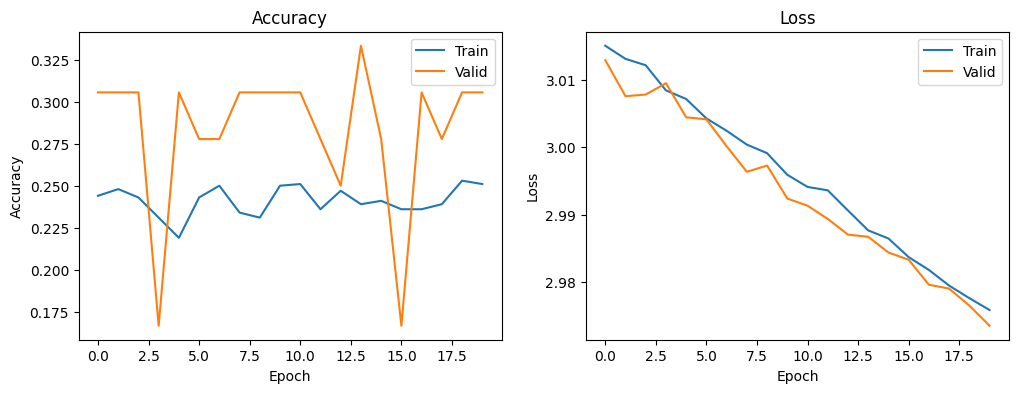

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Valid')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Choose your evaluation generator (valid_generator or test_generator)
eval_generator = valid_generator  # or test_generator

# Calculate how many steps to cover the whole dataset
eval_steps = eval_generator.samples // eval_generator.batch_size

# Reset generator so predictions start from the beginning
eval_generator.reset()

# Get predicted probabilities for all batches
y_pred_prob = model.predict(eval_generator, steps=eval_steps + 1)

# Convert probabilities to predicted class indices
y_pred = np.argmax(y_pred_prob, axis=1)

# True class indices (make sure to slice to length of predictions)
y_true = eval_generator.classes[:len(y_pred)]

# Get class labels (folder names)
class_names = list(eval_generator.class_indices.keys())
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

print(f"Mean Precision (macro-average): {precision:.4f}")
print(f"Mean Recall (macro-average): {recall:.4f}")
print(f"Mean F1-score (macro-average): {f1:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step
Classification Report:

              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00         9
       Other       0.00      0.00      0.00         6
         Sad       0.00      0.00      0.00        10
       happy       0.31      1.00      0.47        11

    accuracy                           0.31        36
   macro avg       0.08      0.25      0.12        36
weighted avg       0.09      0.31      0.14        36

Mean Precision (macro-average): 0.0764
Mean Recall (macro-average): 0.2500
Mean F1-score (macro-average): 0.1170


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

Confusion Matrix:
 [[ 0  0  0  9]
 [ 0  0  0  6]
 [ 0  0  0 10]
 [ 0  0  0 11]]


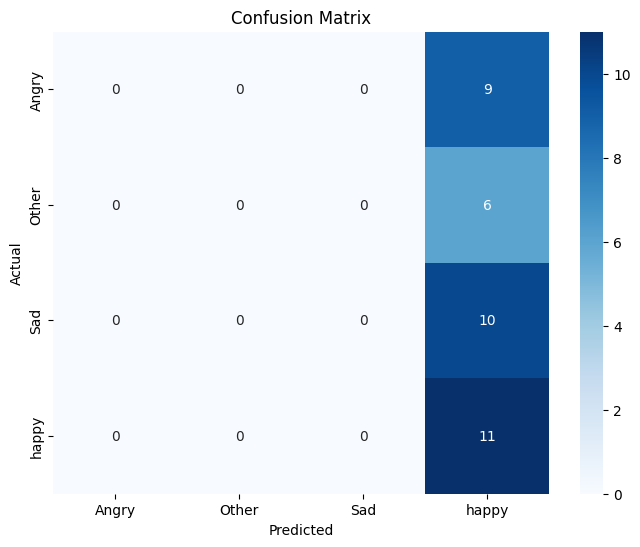

Overall Accuracy: 0.3056


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = np.sum(y_pred == y_true) / len(y_true)
print(f"Overall Accuracy: {accuracy:.4f}")
